In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from yahoo_fin import stock_info as si
import yfinance as yf
import plotly.express as px

In [344]:
def get_annual_dividends(ticker):
    try:
        stock = yf.Ticker(ticker)
        dividends = stock.dividends
        if len(dividends) > 0:
            annual_dividends = dividends.groupby(dividends.index.year).sum()
            annual_dividends_2010 = annual_dividends[annual_dividends.index > 2009]
            return annual_dividends_2010
        else:
            return pd.Series()  # Return an empty series if no dividends
    except Exception as e:
        print(f"Failed to retrieve data for {ticker}: {str(e)}")
        return pd.Series()  # Return an empty series in case of error

def dividendYield(ticker, startYear="2014-01-01", endYear="2024-01-01"):
    try:
        stock = yf.Ticker(ticker)
        data = stock.history(start=startYear, end="2024-01-01")
        dividends_data = data[data['Dividends'] != 0][['Close', 'Dividends']]
        if len(dividends_data) > 0:
            dividends_data['Dividend Yield'] = (dividends_data['Dividends'] / dividends_data['Close'] * 100).round(4)
            return dividends_data
        else:
            return pd.Series()
    except Exception as e:
        # print(f"Failed to retrieve data for {ticker}: {str(e)}")
        return pd.Series() 

def annualReturns(ticker_symbol, plot=False, start_year=None):
    """
    Calculate the annual capital returns of a stock.

    Parameters:
        ticker_symbol (str): The stock ticker symbol.
        plot (bool): Set to True to plot the annual returns.
        start_year (str): Optional, specify a start year in 'YYYY' format.

    Returns:
        pd.Series: A series of annual capital returns.
    """
    try:
        ticker = yf.Ticker(ticker_symbol)
        hist_data = ticker.history(period="max")
        if len(hist_data) > 0:
            if start_year:
                hist_data = hist_data[hist_data.index.year >= int(start_year)-1]
            yearly_prices = hist_data['Close'].resample('Y').last()
            annual_returns = yearly_prices.pct_change().dropna()
            annual_returns_percentage = (annual_returns * 100).round(2)
    
            if plot:
                fig, ax = plt.subplots(figsize=(10, 6))
                annual_returns_percentage.plot(kind='bar', color=(annual_returns_percentage > 0).map({True: 'g', False: 'r'}), ax=ax)
                plt.title('Annual Capital Returns of ' + ticker_symbol)
                plt.ylabel('Percentage Return (%)')
                plt.xlabel('Year')
                plt.axhline(0, color='black')
        
                ax.set_xticklabels([x.strftime('%Y') for x in annual_returns_percentage.index])
        
                for p in ax.patches:
                    text = f"{p.get_height():.2f}%"
                    x = p.get_x() + p.get_width() / 2
                    y = p.get_height()
                    vertical_alignment = 'bottom'
                    vertical_offset = 2
                    if y < 0:
                        vertical_alignment = 'top'
                        vertical_offset = -2
                    ax.annotate(text, (x, y), ha='center', va=vertical_alignment, xytext=(0, vertical_offset), textcoords='offset points')
        
                plt.show()
        
            return annual_returns_percentage
        else:
            return pd.Series()
    except Exception as e:
        # print(f"Failed to retrieve data for {ticker}: {str(e)}")
        return pd.Series() 

def get_pe_ratios(ticker_symbol):
    """
    Fetches the trailing and forward P/E ratios for a given stock ticker using yfinance.

    Parameters:
        ticker_symbol (str): The stock ticker symbol.

    Returns:
        tuple: A tuple containing the trailing P/E ratio and forward P/E ratio.
    """
    # Create a ticker object
    ticker = yf.Ticker(ticker_symbol)

    # Fetch the stock's info dictionary
    stock_info = ticker.info

    # Get the trailing and forward P/E ratios
    trailing_pe = stock_info.get('trailingPE', None)
    forward_pe = stock_info.get('forwardPE', None)

    if trailing_pe is not None:
        trailing_pe = round(trailing_pe, 2)
    if forward_pe is not None:
        forward_pe = round(forward_pe, 2)
        
    return trailing_pe, forward_pe


### SPY Analysis

In [350]:
spy = yf.Ticker("SPY")
pe_ratio = spy.info.get('trailingPE', None)
print("The current P/E ratio for SPY is:", round(pe_ratio, 2))

The current P/E ratio for SPY is: 27.41


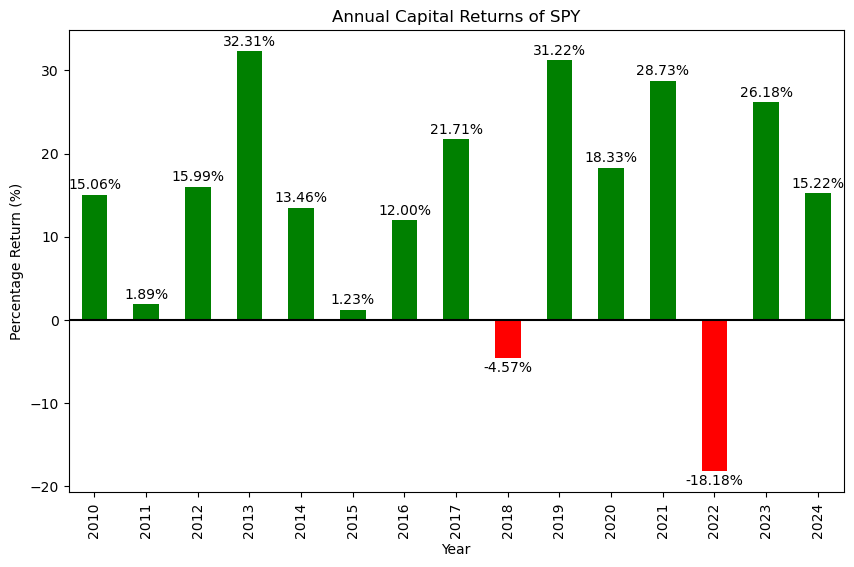

Date
2010-12-31 00:00:00-05:00    15.06
2011-12-31 00:00:00-05:00     1.89
2012-12-31 00:00:00-05:00    15.99
2013-12-31 00:00:00-05:00    32.31
2014-12-31 00:00:00-05:00    13.46
2015-12-31 00:00:00-05:00     1.23
2016-12-31 00:00:00-05:00    12.00
2017-12-31 00:00:00-05:00    21.71
2018-12-31 00:00:00-05:00    -4.57
2019-12-31 00:00:00-05:00    31.22
2020-12-31 00:00:00-05:00    18.33
2021-12-31 00:00:00-05:00    28.73
2022-12-31 00:00:00-05:00   -18.18
2023-12-31 00:00:00-05:00    26.18
2024-12-31 00:00:00-05:00    15.22
Freq: A-DEC, Name: Close, dtype: float64

In [351]:
annualReturns("SPY", plot=True, start_year=2010)

### Stock Tickers

In [301]:
djia = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1][['Symbol', 'Company', 'Industry']]
djia.head()

,Symbol,Company,Industry
0,MMM,3M,Conglomerate
1,AXP,American Express,Financial services
2,AMGN,Amgen,Biopharmaceutical
3,AMZN,Amazon,Retailing
4,AAPL,Apple,Information technology


In [302]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0][['Symbol', 'Security', 'GICS Sector']]
sp500.head()

,Symbol,Security,GICS Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology


In [308]:
djia[~djia['Symbol'].isin(sp500['Symbol'])]

,Symbol,Company,Industry


### Dividends

In [ ]:
dividend_data = []
for ticker in sp500['Symbol']:
    dividendsYield = dividendYield(ticker, startYear="2014-01-01")
    if len(dividendsYield) > 0:
        dividendsYield = dividendsYield['Dividend Yield']
        dividendsYield.name = ticker 
        dividend_data.append(dividendsYield)

dividends_df = pd.concat(dividend_data, axis=1)
dividends_df = dividends_df.groupby(dividends_df.index.year).sum()
dividends_df

In [305]:
dividends_df

,MMM,AOS,ABT,ABBV,ACN,AES,AFL,A,APD,ALB,...,WRK,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014,3.3464,1.4545,2.6805,4.8676,2.9779,1.9505,3.1110,0.7605,2.9747,1.9620,...,0.0000,4.7332,7.4386,3.2715,3.7118,5.1487,1.5655,2.4624,0.9210,0.9373
2015,3.5595,1.2891,2.5101,4.7903,2.4706,4.4406,3.0810,1.4021,2.9230,2.6110,...,1.8109,5.6602,10.4428,3.1665,2.9900,5.0096,1.7866,2.6237,0.8947,0.7668
2016,3.5279,1.3426,2.8867,5.4701,2.2476,5.2196,3.0071,1.1442,2.9245,1.8027,...,4.8740,5.6860,12.9314,1.7667,2.5121,4.2039,1.5402,2.7124,0.9047,0.8802
2017,3.0290,1.1805,2.5771,4.9261,2.2227,5.4389,2.6664,0.9463,3.0120,1.1925,...,3.6121,4.8823,6.2118,1.6019,1.7581,3.7948,1.3968,1.9410,0.8374,0.7519
2018,3.3031,1.4980,1.9914,4.9875,1.9703,4.8612,2.6469,0.9703,3.1314,1.5112,...,3.7805,5.1320,7.3519,1.7506,2.1030,3.9426,1.2598,1.9322,0.8983,0.6252
2019,4.1212,1.9858,1.8067,6.9191,1.3417,3.7830,2.3584,0.8710,2.3809,2.1253,...,5.6081,6.4084,8.1263,1.4673,3.3616,3.1107,1.3365,1.8151,0.7635,0.6570
2020,4.3729,2.2287,1.6447,6.2884,1.6980,3.8883,3.0559,0.6441,2.3631,1.8320,...,3.4312,2.1567,11.2911,1.4907,0.8893,2.9968,1.3704,2.0303,0.8101,0.5824
2021,3.6172,1.6860,1.6288,5.2621,1.2772,2.6107,2.6345,0.5813,2.2774,0.8324,...,1.9906,3.7703,7.5014,1.3128,0.0000,3.0532,0.9852,1.7569,0.6567,0.5573
2022,4.6475,1.9115,1.7197,4.1597,1.3983,2.9578,2.6537,0.7921,2.6515,0.6785,...,2.5663,6.2104,5.6519,1.5272,0.0000,2.9686,1.3289,1.9757,0.8373,0.7475


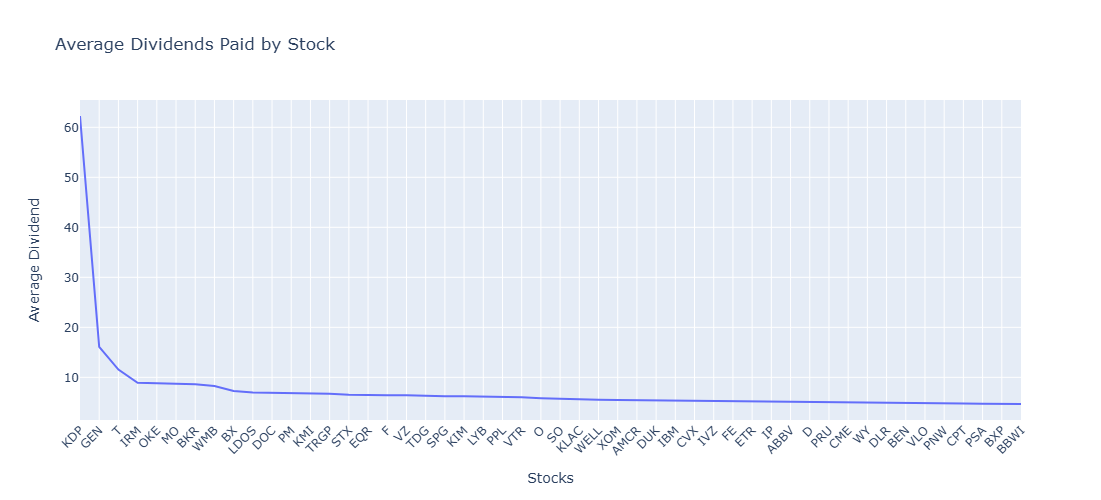

In [321]:
avg_dividends = dividends_df.mean().sort_values(ascending=False)[:50]

fig = px.line(
    x=avg_dividends.index, 
    y=avg_dividends.values, 
    labels={'x': 'Stocks', 'y': 'Average Dividend'}, 
    title='Average Dividends Paid by Stock'
)

fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(len(avg_dividends))), ticktext=avg_dividends.index),
    xaxis_title='Stocks',
    yaxis_title='Average Dividend',
    title='Average Dividends Paid by Stock',
    xaxis_tickangle=-45,
    height=500
)
fig.show()

### Capital Returns

In [ ]:
return_data = []
for ticker in sp500['Symbol']:
    annualReturn = annualReturns(ticker, start_year="2014")
    if len(annualReturn) > 0:
        annualReturn.name = ticker 
        return_data.append(annualReturn)

returns_df = pd.concat(return_data, axis=1)
returns_df = returns_df.groupby(returns_df.index.year).sum()


In [326]:
returns_df

,MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,...,WY,WMB,WTW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2014,20.00,5.88,20.08,27.92,11.42,21.41,-31.01,-3.74,-6.26,0.78,...,17.35,21.35,2.83,-20.89,33.49,11.57,-1.66,43.14,22.76,32.80
2015,-5.91,37.35,1.87,-6.50,19.53,29.22,7.49,-28.20,0.54,3.46,...,-13.12,-39.14,11.44,-52.27,3.84,-2.58,2.50,-10.02,-8.80,12.18
2016,21.72,25.07,-12.32,9.79,14.35,9.59,295.12,26.39,19.10,10.16,...,4.58,31.18,-3.44,27.90,17.14,37.60,23.44,23.13,1.46,12.64
2017,34.90,30.78,52.03,60.07,33.34,70.22,-9.35,-2.69,29.02,48.32,...,21.60,2.02,25.05,98.09,21.91,39.50,31.09,21.04,17.86,35.55
2018,-16.90,-29.35,29.06,-0.96,-6.23,29.10,79.57,39.02,6.20,1.67,...,-35.46,-23.88,2.42,-40.18,5.88,-1.01,14.61,53.40,-13.30,19.45
2019,-4.29,13.65,22.08,1.47,51.21,45.78,148.43,42.16,18.55,27.54,...,45.57,14.18,34.81,44.99,32.37,19.59,11.41,60.42,45.37,55.71
2020,2.77,17.46,28.04,27.72,26.04,51.64,99.98,22.15,-13.60,39.79,...,13.04,-8.20,5.83,-18.07,7.77,30.90,9.85,50.46,3.77,25.76
2021,4.85,59.28,30.53,32.43,60.67,13.38,56.91,5.95,34.55,35.51,...,26.92,38.36,14.16,-24.63,4.40,18.94,30.05,54.87,-17.02,48.26
2022,-29.63,-32.07,-20.68,24.01,-34.75,-40.65,-54.99,21.69,26.41,-5.52,...,-20.44,32.83,4.53,-3.02,6.45,-6.60,-5.99,-56.92,4.24,-39.51


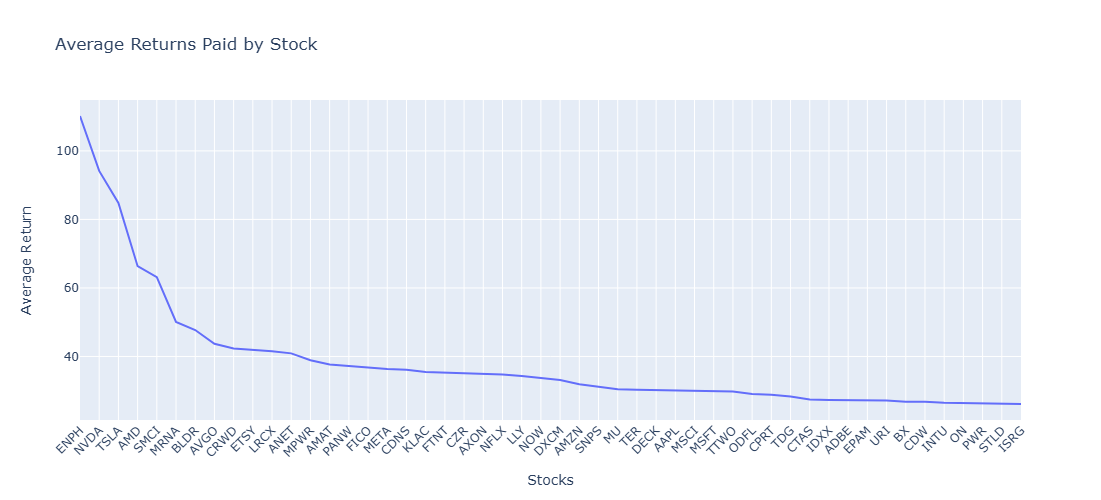

In [325]:
mean_returns = returns_df.mean().sort_values(ascending=False)[:50]

fig = px.line(
    x=mean_returns.index, 
    y=mean_returns.values, 
    labels={'x': 'Stocks', 'y': 'Average Return'}, 
    title='Average Returns Paid by Stock'
)

fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=list(range(len(mean_returns))), ticktext=mean_returns.index),
    xaxis_title='Stocks',
    yaxis_title='Average Return',
    title='Average Returns Paid by Stock',
    xaxis_tickangle=-45,
    height=500, 
)

fig.show()

In [346]:
pe_ratios_df = pd.DataFrame(index=sp500['Symbol'], columns=['Trailing P/E', 'Forward P/E'], dtype=float)

for ticker in sp500['Symbol']:
    trailing_pe, forward_pe = get_pe_ratios(ticker) 
    pe_ratios_df.loc[ticker, 'Trailing P/E'] = trailing_pe
    pe_ratios_df.loc[ticker, 'Forward P/E'] = forward_pe

pe_ratios_df

,Trailing P/E,Forward P/E
Symbol,,
MMM,NaN,13.07
AOS,21.24,18.80
ABT,32.37,20.22
ABBV,51.05,14.22
ACN,27.81,23.72
...,...,...
XYL,47.09,28.49
YUM,23.49,20.76
ZBRA,60.93,21.00


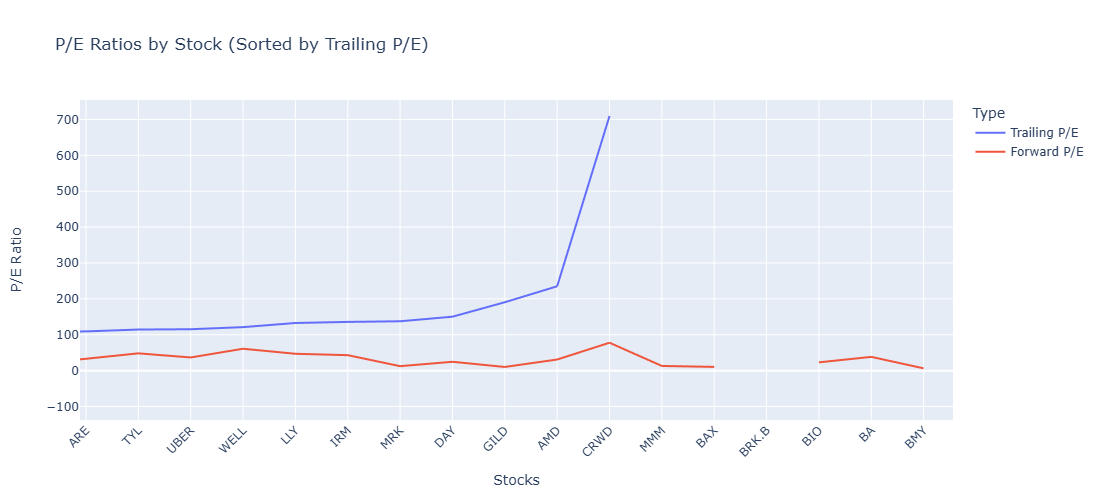

In [355]:
pe_ratios_df_sorted = pe_ratios_df.sort_values('Trailing P/E', ascending=True)

# Melting the sorted DataFrame to format it suitably for plotting with Plotly Express
pe_ratios_melted = pe_ratios_df_sorted.reset_index().melt(id_vars='Symbol', value_vars=['Trailing P/E', 'Forward P/E'],
                                                   var_name='Type', value_name='P/E Ratio')

# Creating the line plot
fig = px.line(
    pe_ratios_melted, 
    x='Symbol', 
    y='P/E Ratio', 
    color='Type',  # Differentiates line colors based on the P/E type
    labels={'Symbol': 'Stocks', 'P/E Ratio': 'P/E Value'}, 
    title='P/E Ratios by Stock (Sorted by Trailing P/E)'
)

# Updating layout for clarity
fig.update_layout(
    xaxis=dict(
        tickmode='array', 
        tickvals=list(range(len(pe_ratios_df_sorted))), 
        ticktext=pe_ratios_df_sorted.index,
        title='Stocks',
        tickangle=-45
    ),
    yaxis_title='P/E Ratio',
    title='P/E Ratios by Stock (Sorted by Trailing P/E)',
    height=500
)

# Display the plot
fig.show()

## Single Stock Analysis

In [45]:


def calculate_income_indicators(ticker):
    """
    Calculates various income indicators for the given ticker over the past 10 years.

    Args:
    ticker (str): The stock symbol to fetch data for.

    Returns:
    DataFrame: A DataFrame with years, revenues, COGS, and various profit margins and ratios.
    """
    # Fetch the historical financial data
    stock = yf.Ticker(ticker)
    income_statement = stock.get_income_stmt().T  # Transpose to make dates the index

    # Calculate gross profit margin
    income_statement['Gross Profit Margin'] = income_statement['GrossProfit'] / income_statement['TotalRevenue'] * 100
    income_statement['Gross Profit Margin'] = [round(i, 2) for i in income_statement['Gross Profit Margin']]

    # Calculate SG&A to gross profit ratio
    income_statement['SG&A to Gross Profit Ratio'] = income_statement['SellingGeneralAndAdministration'] / income_statement['GrossProfit'] * 100
    income_statement['SG&A to Gross Profit Ratio'] = [round(i, 2) for i in income_statement['SG&A to Gross Profit Ratio']]

    # Conditionally calculate R&D to gross profit ratio if R&D data is available
    if 'ResearchAndDevelopment' in income_statement.columns:
        income_statement['R&D to Gross Profit Ratio'] = income_statement['ResearchAndDevelopment'] / income_statement['GrossProfit'] * 100
        income_statement['R&D to Gross Profit Ratio'] = [round(i, 2) for i in income_statement['R&D to Gross Profit Ratio']]
    else:
        # Optionally set it to None or 0 if you prefer
        income_statement['R&D to Gross Profit Ratio'] = None

    # Calculate net profit ratio
    income_statement['Net Profit Ratio'] = income_statement['NetIncome'] / income_statement['GrossProfit'] * 100
    income_statement['Net Profit Ratio'] = [round(i, 2) for i in income_statement['Net Profit Ratio']]
    
    shares_data = stock.info['sharesOutstanding']

    # Calculate EPS
    income_statement['EPS'] = income_statement['NetIncome'] / shares_data

    
    # Return the relevant data, check if R&D Ratio needs to be included based on its existence
    columns_to_return = ['TotalRevenue', 'GrossProfit', 'Gross Profit Margin', 'SG&A to Gross Profit Ratio', 'Net Profit Ratio', 'EPS']
    if 'R&D to Gross Profit Ratio' in income_statement.columns:
        columns_to_return.append('R&D to Gross Profit Ratio')

    return income_statement[columns_to_return]

# Example usage:
ticker = "MMM"  # McDonald's Corporation
income_data = calculate_income_indicators(ticker)
income_data


,TotalRevenue,GrossProfit,Gross Profit Margin,SG&A to Gross Profit Ratio,Net Profit Ratio,EPS,R&D to Gross Profit Ratio
2023-12-31,32681000000.0,14204000000.0,43.46,150.64,-49.25,-12.640934,12.97
2022-12-31,34229000000.0,14997000000.0,43.81,58.69,38.52,10.439839,12.42
2021-12-31,35355000000.0,16560000000.0,46.84,41.67,35.75,10.700067,12.04
2020-12-31,32184000000.0,15579000000.0,48.41,43.62,34.98,9.847098,12.05
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
stock = yf.Ticker("NIKE")
income_statement = stock.get_income_stmt()

In [42]:
income_statement

""
